**About Dataset**

Dataset has the information for each gameweek of the Fantasy Premier league season (2017-18).

Description of dataset

In [1]:
import pandas as pd

# Load the first dataset to understand its structure and contents
file_path_week0 = 'FPL_2018_19_Wk0.csv'
data_week0 = pd.read_csv(file_path_week0)

# Display basic information and the first few rows of the dataset
data_week0.info(), data_week0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              472 non-null    object 
 1   Team              472 non-null    object 
 2   Position          472 non-null    object 
 3   Cost              472 non-null    int64  
 4   Creativity        472 non-null    float64
 5   Influence         472 non-null    float64
 6   Threat            472 non-null    float64
 7   ICT               472 non-null    float64
 8   Goals_conceded    472 non-null    int64  
 9   Goals_scored      472 non-null    int64  
 10  Assists           472 non-null    int64  
 11  Own_goals         472 non-null    int64  
 12  Penalties_missed  472 non-null    int64  
 13  Penalties_saved   472 non-null    int64  
 14  Saves             472 non-null    int64  
 15  Yellow_cards      472 non-null    int64  
 16  Red_cards         472 non-null    int64  
 1

(None,
          Name Team Position  Cost  Creativity  Influence  Threat    ICT  \
 0  Adam Smith  BOU      DEF    45       345.5      455.0   144.0   94.5   
 1      Adrian  WHU      GKP    45         0.0      470.4     0.0   47.0   
 2      Aguero  MCI      FWD   110       570.8      966.4  1484.0  302.5   
 3         Ake  BOU      DEF    50       115.1      932.4   287.0  133.5   
 4  Albrighton  LEI      MID    55       718.3      580.0   300.0  160.2   
 
    Goals_conceded  Goals_scored  ...  Own_goals  Penalties_missed  \
 0              38             1  ...          0                 0   
 1              29             0  ...          0                 0   
 2              12            21  ...          0                 0   
 3              59             2  ...          0                 0   
 4              42             2  ...          0                 0   
 
    Penalties_saved  Saves  Yellow_cards  Red_cards   TSB  Minutes  Bonus  \
 0                0      0          

This dataset contains 472 entries (or players) and 21 columns of data. Here's a brief description of the columns:

1. **Name**: The name of the player.
2. **Team**: The team that the player belongs to.
3. **Position**: The position where the player usually plays (e.g., Defender, Midfielder, Forward).
4. **Cost**: The cost of the player in the fantasy league.
5. **Creativity, Influence, Threat, ICT**: These are performance metrics calculated by the Fantasy Premier League. ICT is an index that combines Creativity, Influence, and Threat.
6. **Goals_conceded, Goals_scored**: The number of goals conceded and scored by the player.
7. **Assists, Own_goals, Penalties_missed, Penalties_saved**: Other game-related statistics.
8. **Saves, Yellow_cards, Red_cards**: Number of saves (for goalkeepers), and the number of yellow and red cards received.
9. **TSB**: The percentage of fantasy teams that have selected the player.
10. **Minutes**: The total minutes played by the player in the season up to that point.
11. **Bonus**: Bonus points earned by the player based on performance.
12. **Points**: The total fantasy points accumulated by the player.

The first five rows of your data give a snapshot of the information available for each player. For example, the first row corresponds to Adam Smith, a defender from Bournemouth (BOU), who has a cost of 45, creativity score of 345.5, influence score of 455.0, threat score of 144.0, and an ICT index of 94.5. He has conceded 38 goals, scored 1 goal, and has not missed or saved any penalties. He has not received any red cards, has received 6 yellow cards, and has not made any saves. He has been selected by 0.3% of the teams, has played 2067 minutes, earned 3 bonus points, and accumulated a total of 56 points.


# Preprocessing of FPD datasets - Missing values, Correct datatypes

Below code Preprocesses the Fantasy Premier League datasets by handling missing values and ensuring correct data type

*   For each dataframe, it calculates the total number of missing values per column and the data type of each column.
*For each dataframe, it iterates over each column. If the column is numeric (int64 or float64), it fills the missing values with the mean of the column. If the column is categorical (object), it fills the missing values with the mode (most frequent value) of the column.
*For each dataframe, it iterates over each column. If the column is of type float64 and all its values are integers, it converts the column to int type.


In [2]:
# Define the file paths for all datasets
file_paths = [
'FPL_2018_19_Wk0.csv', 'FPL_2018_19_Wk1.csv',
'FPL_2018_19_Wk2.csv', 'FPL_2018_19_Wk3.csv',
'FPL_2018_19_Wk4.csv', 'FPL_2018_19_Wk5.csv',
'FPL_2018_19_Wk6.csv', 'FPL_2018_19_Wk7.csv',
'FPL_2018_19_Wk8.csv', 'FPL_2018_19_Wk9.csv',
'FPL_2018_19_Wk10.csv'
]

# Load all datasets into a list of dataframes
dataframes = [pd.read_csv(f) for f in file_paths]

# Check for missing values and data types
missing_values_info = [df.isnull().sum() for df in dataframes]
data_types_info = [df.dtypes for df in dataframes]

# Fill missing values with mean or median for numerical columns and mode for categorical columns
for df in dataframes:
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Numeric columns
            df[column].fillna(df[column].mean(), inplace=True)
        else:  # Categorical columns
            df[column].fillna(df[column].mode()[0], inplace=True)

# Correct data types if necessary (e.g., converting 'Points' to int if they are float but always whole numbers)
for df in dataframes:
    for column in df.columns:
        if df[column].dtype == 'float64' and df[column].apply(float.is_integer).all():
            df[column] = df[column].astype(int)

missing_values_info, data_types_info


([Name                0
  Team                0
  Position            0
  Cost                0
  Creativity          0
  Influence           0
  Threat              0
  ICT                 0
  Goals_conceded      0
  Goals_scored        0
  Assists             0
  Own_goals           0
  Penalties_missed    0
  Penalties_saved     0
  Saves               0
  Yellow_cards        0
  Red_cards           0
  TSB                 0
  Minutes             0
  Bonus               0
  Points              0
  dtype: int64,
  Name                0
  Team                0
  Position            0
  Cost                0
  Creativity          0
  Influence           0
  Threat              0
  ICT                 0
  Goals_conceded      0
  Goals_scored        0
  Assists             0
  Own_goals           0
  Penalties_missed    0
  Penalties_saved     0
  Saves               0
  Yellow_cards        0
  Red_cards           0
  TSB                 0
  Minutes             0
  Bonus               0


#Summary statistics

In [3]:
# Generate summary statistics for all numerical columns across all datasets
combined_data = pd.concat(dataframes, ignore_index=True)

summary_statistics = combined_data.describe().T

# Count of categorical data for 'Position' and 'Team' across all datasets
position_counts = combined_data['Position'].value_counts()
team_counts = combined_data['Team'].value_counts()

summary_statistics, position_counts, team_counts

(                   count        mean         std   min   25%    50%    75%  \
 Cost              5863.0   52.391608   12.642871  38.0  45.0   49.0   55.0   
 Creativity        5863.0   48.454153  104.462010   0.0   0.0   10.8   55.3   
 Influence         5863.0   74.791438  126.765520   0.0   0.0   27.0  100.6   
 Threat            5863.0   53.311104  123.760110   0.0   0.0    6.0   55.0   
 ICT               5863.0   17.644227   31.972029   0.0   0.0    6.6   22.3   
 Goals_conceded    5863.0    4.917619    7.685311   0.0   0.0    2.0    7.0   
 Goals_scored      5863.0    0.444823    1.389873   0.0   0.0    0.0    0.0   
 Assists           5863.0    0.411223    1.143980   0.0   0.0    0.0    0.0   
 Own_goals         5863.0    0.015009    0.131053   0.0   0.0    0.0    0.0   
 Penalties_missed  5863.0    0.012792    0.119735   0.0   0.0    0.0    0.0   
 Penalties_saved   5863.0    0.011598    0.132691   0.0   0.0    0.0    0.0   
 Saves             5863.0    1.012110    6.662582   

#EDA plots

*   Distribution of Key Metrics: Visualize distributions of continuous variables like Cost, Points, Creativity, Influence, Threat using histograms or density plots.
* Correlation Heatmap: Use a heatmap to identify the correlations between different numerical features.
* Box Plots: To check for outliers and the spread of scores, assists, goals, etc., across different positions.


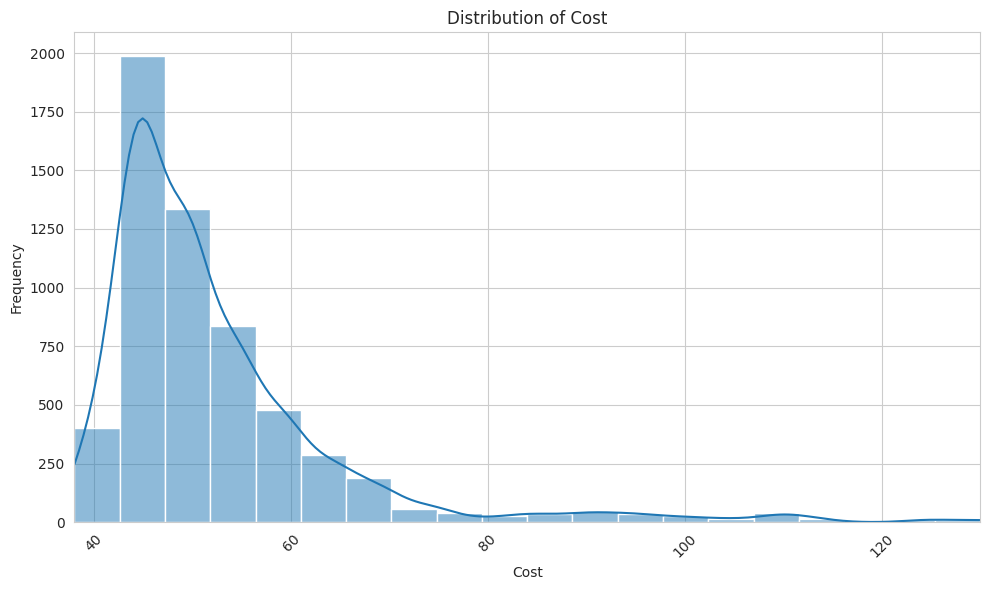

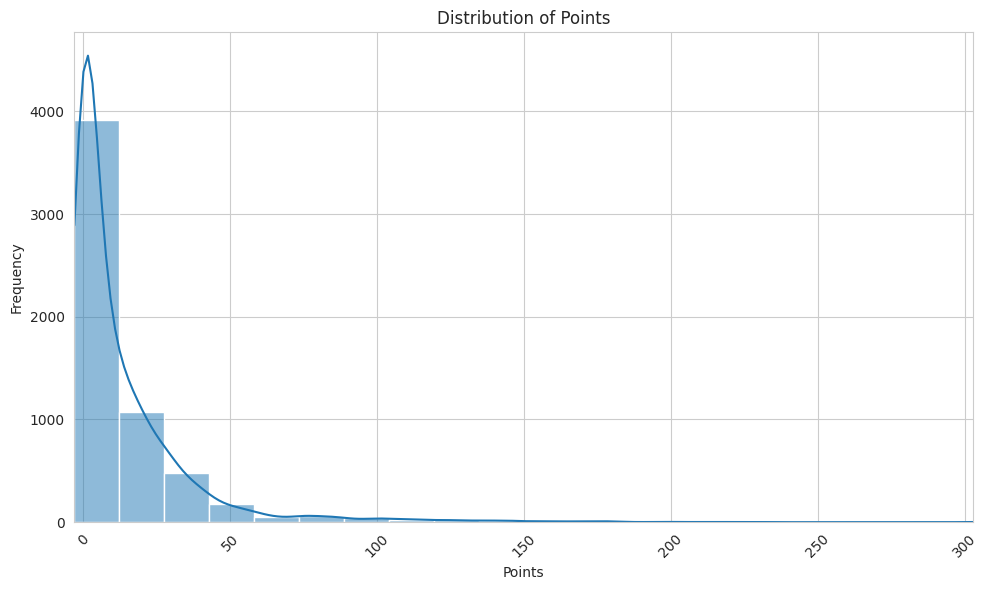

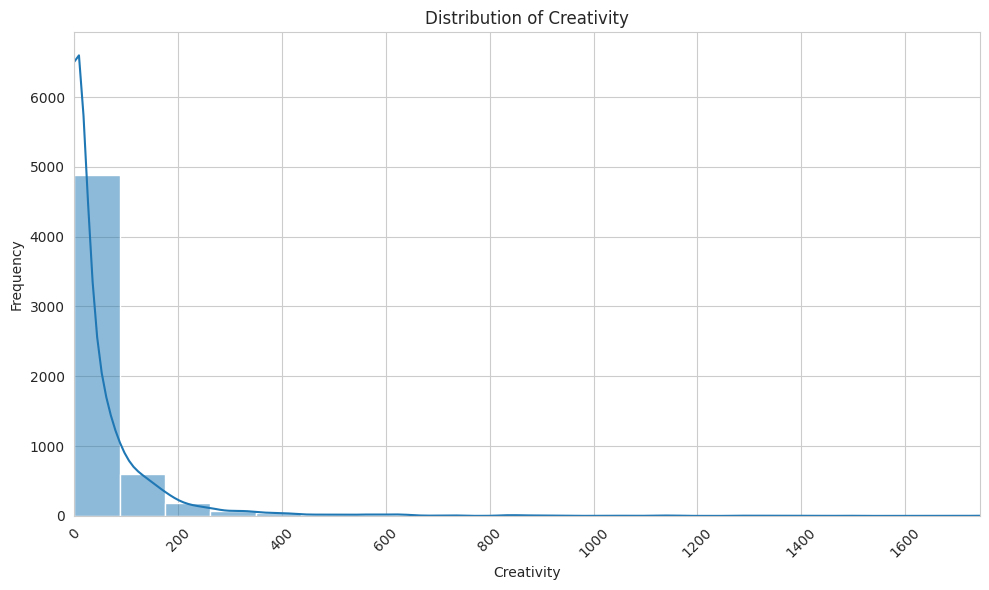

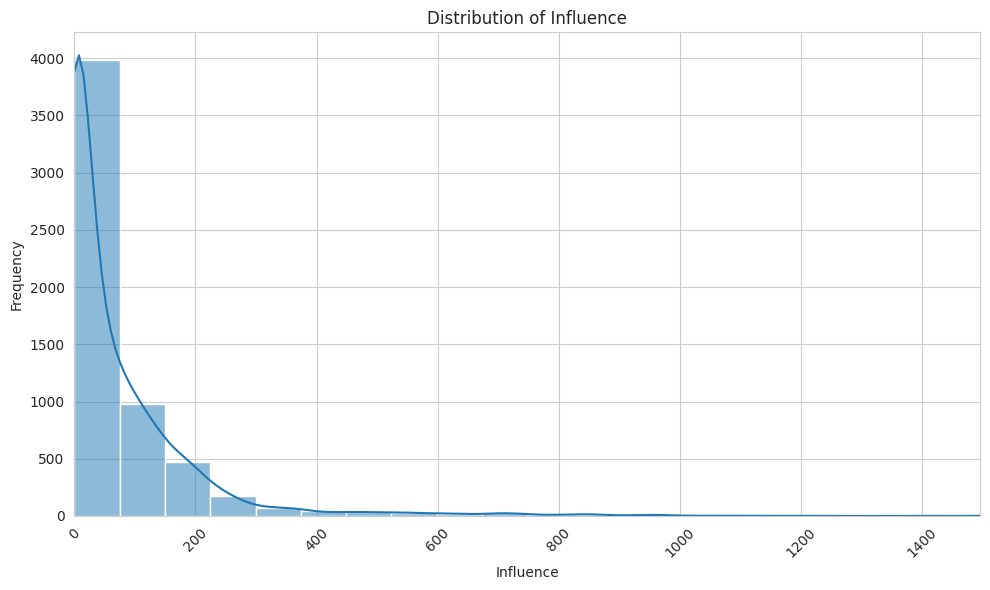

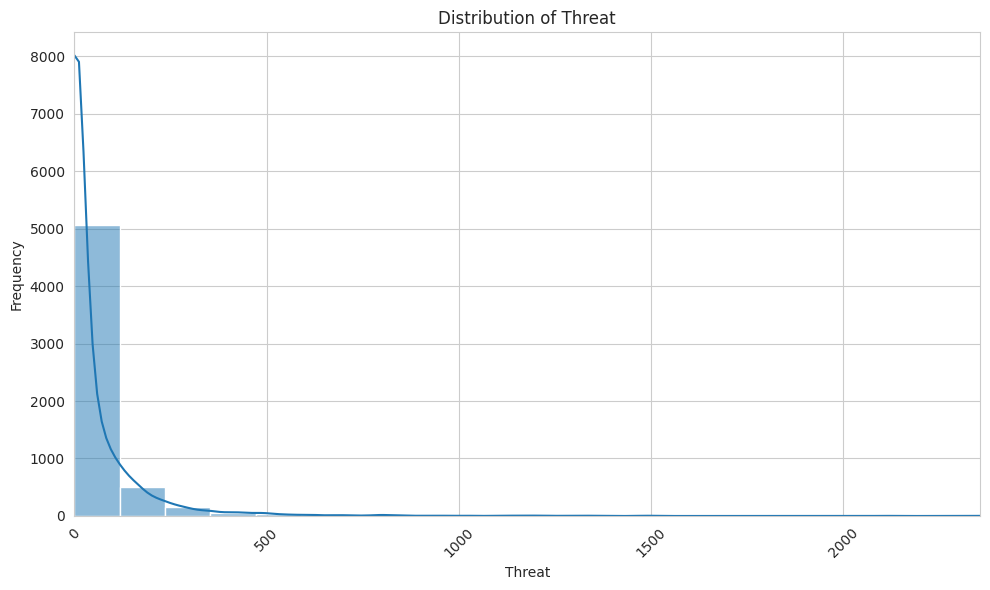

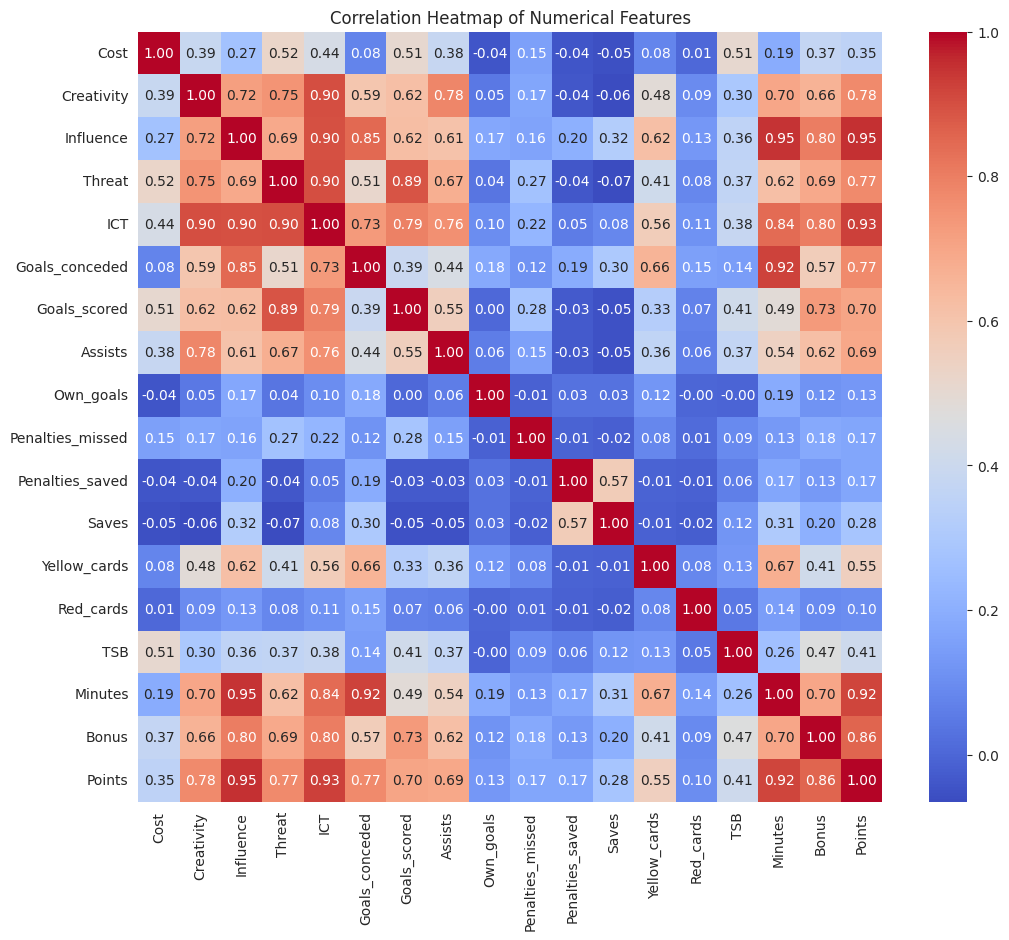

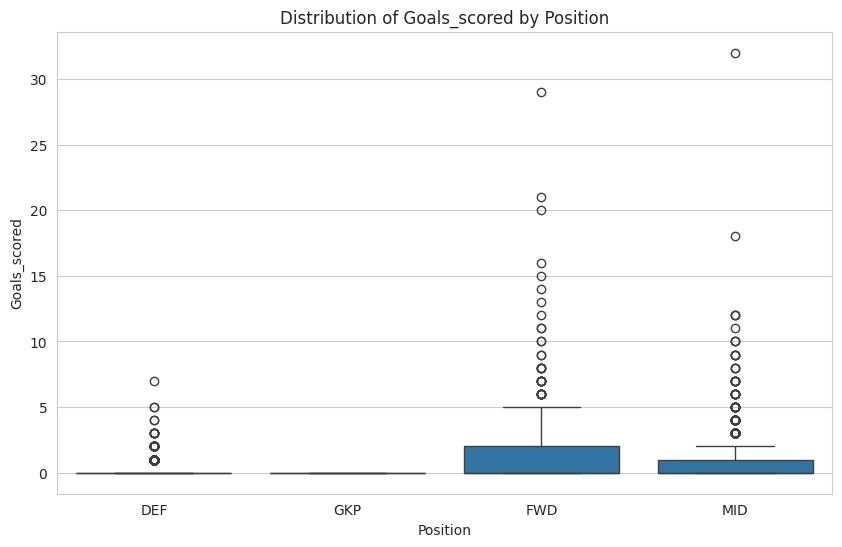

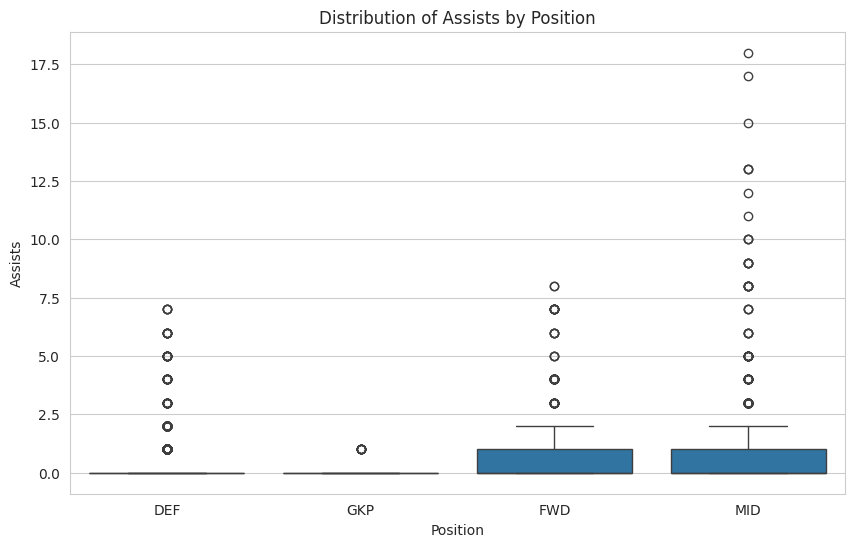

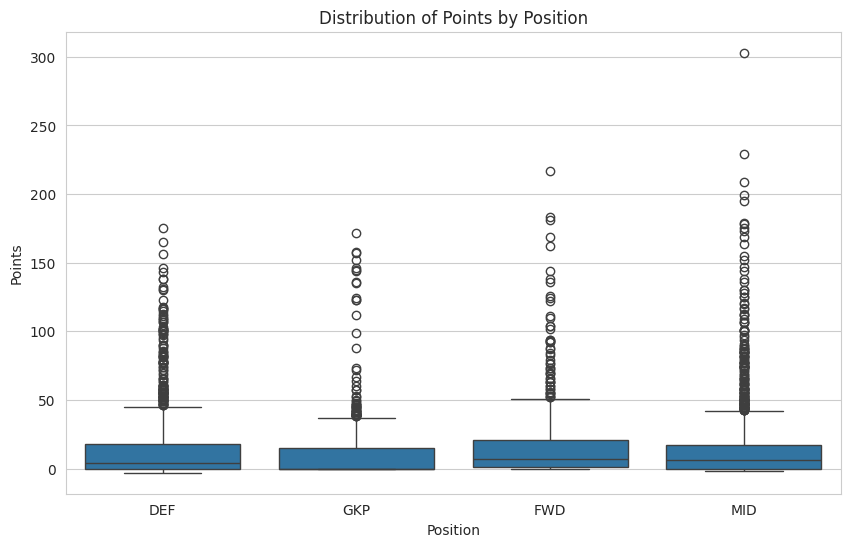

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of variables to plot
variables = ['Cost', 'Points', 'Creativity', 'Influence', 'Threat']

# Create histograms
for var in variables:
    plt.figure(figsize=(10, 6))

    # Plot histogram of the variable
    sns.histplot(data=combined_data, x=var, kde=True, bins=20)  # Adjust the number of bins as needed

    # Adjust x-axis range based on data distribution
    x_min = combined_data[var].min()
    x_max = combined_data[var].max()
    plt.xlim(x_min, x_max)

    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
numeric_data = combined_data.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Metrics to analyze
metrics = ['Goals_scored', 'Assists', 'Points']

# Create box plots
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Position', y=metric, data=combined_data)
    plt.title(f'Distribution of {metric} by Position')
    plt.xlabel('Position')
    plt.ylabel(metric)
    plt.show()

#Time series analysis

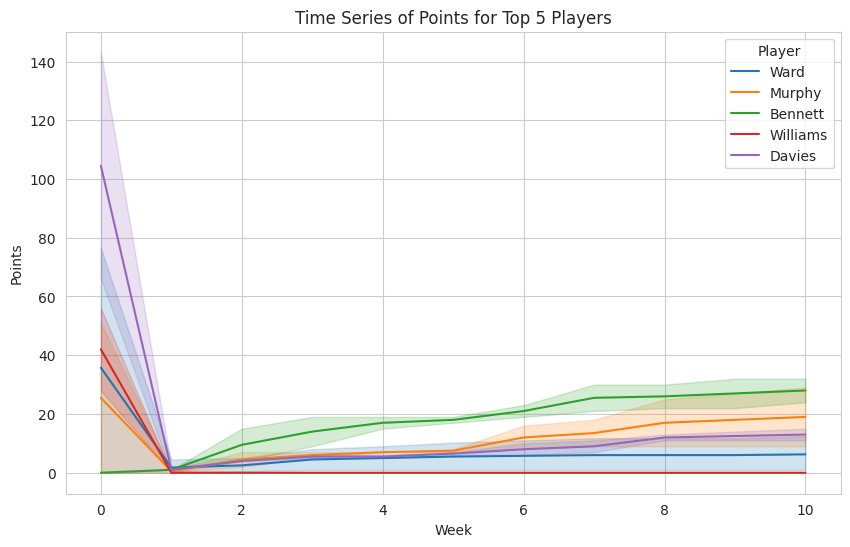

In [5]:
# Combine all dataframes into one for time series and comparative analysis, adding a 'Week' column
for i, df in enumerate(dataframes):
    df['Week'] = i

# Concatenate all the dataframes
combined_data = pd.concat(dataframes, ignore_index=True)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Time Series Analysis: Analyze how players' performances change over the weeks using line plots

# Group data by 'Name' and plot the time series of 'Points' across weeks
players_to_plot = combined_data['Name'].value_counts().index[:5]  # Select top 5 most frequent players
fig, ax = plt.subplots(figsize=(10, 6))
for player in players_to_plot:
    player_data = combined_data[combined_data['Name'] == player]
    sns.lineplot(data=player_data, x='Week', y='Points', label=player, ax=ax)

ax.set_title('Time Series of Points for Top 5 Players')
ax.set_xlabel('Week')
ax.set_ylabel('Points')
ax.legend(title='Player')
plt.show()

#Competitive analysis

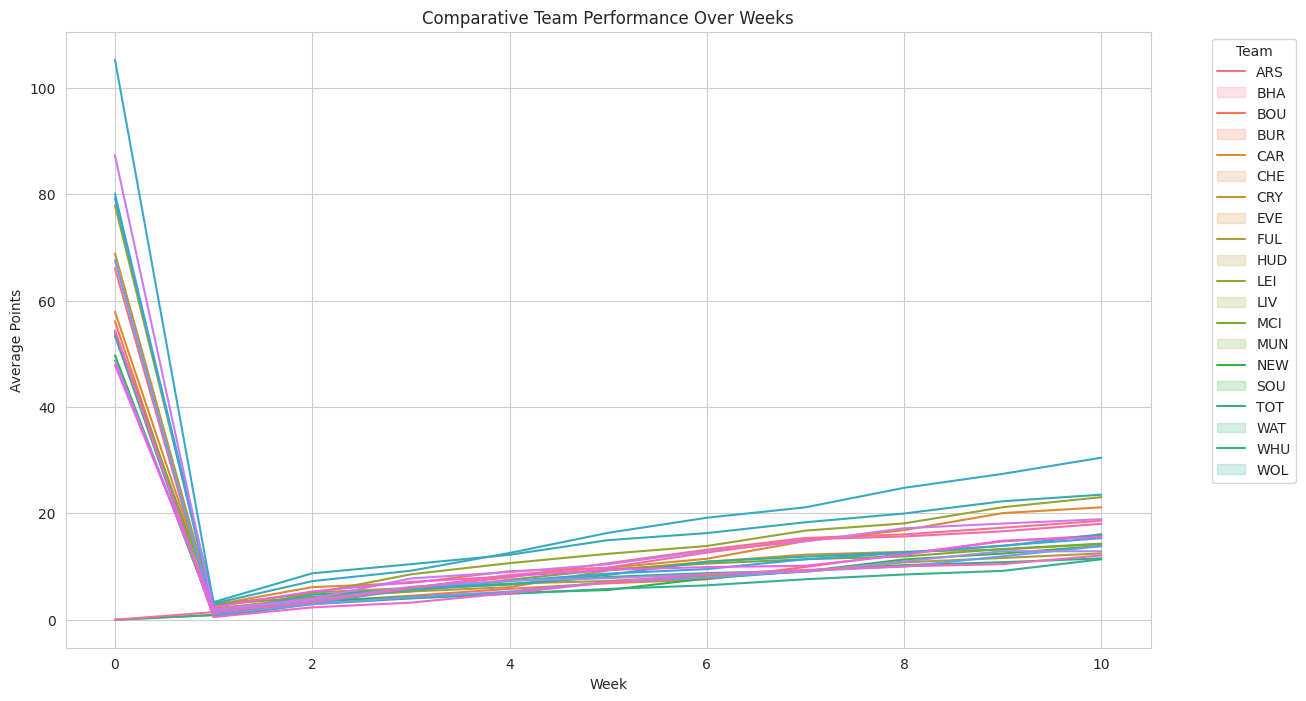

In [6]:
# Compare how different teams' players perform against each other

# Group by 'Team' and 'Week', then average 'Points'
team_performance = combined_data.groupby(['Team', 'Week'])['Points'].mean().unstack().T
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data=team_performance, dashes=False, ax=ax, legend=None)
ax.set_title('Comparative Team Performance Over Weeks')
ax.set_xlabel('Week')
ax.set_ylabel('Average Points')
plt.legend(title='Team', labels=team_performance.columns, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Performance by Position

In [7]:
# Performance by Position: Average points, goals scored, and other metrics by position
position_performance = combined_data.groupby('Position').agg({
    'Points': 'mean',
    'Goals_scored': 'mean',
    'Assists': 'mean',
    'Creativity': 'mean',
    'Influence': 'mean',
    'Threat': 'mean'
}).reset_index()

# Team Performance: Average points by team
team_points_performance = combined_data.groupby('Team')['Points'].mean().sort_values(ascending=False).reset_index()

position_performance, team_points_performance


(  Position     Points  Goals_scored   Assists  Creativity  Influence  \
 0      DEF  12.797785      0.183919  0.324506   34.186375  81.152335   
 1      FWD  15.746341      1.164634  0.629268   54.584024  67.684878   
 2      GKP  11.895161      0.000000  0.016129    1.003548  74.543871   
 3      MID  13.756181      0.541773  0.516198   71.483589  71.709292   
 
        Threat  
 0   27.878671  
 1  124.095122  
 2    0.070968  
 3   65.156436  ,
    Team     Points
 0   MCI  24.923664
 1   LIV  21.053763
 2   CHE  18.524590
 3   TOT  17.665480
 4   ARS  16.229091
 5   BOU  15.916350
 6   MUN  14.952542
 7   BUR  13.566308
 8   WAT  12.887850
 9   LEI  12.752475
 10  CRY  12.621160
 11  BHA  12.214789
 12  NEW  11.859060
 13  SOU  11.560811
 14  WHU  10.885714
 15  EVE  10.497238
 16  HUD  10.049505
 17  WOL   9.893238
 18  CAR   7.253333
 19  FUL   7.175373)

#Top performers

In [8]:
# Identify top performers based on Points, Goals_scored, and other metrics
top_performers = combined_data.loc[:, ['Name', 'Team', 'Position', 'Points', 'Goals_scored', 'Assists', 'Cost']].copy()
top_performers.sort_values(by='Points', ascending=False, inplace=True)

# Top 10 performers based on Points
top_10_points = top_performers.head(10)

# Top 10 performers based on Goals Scored
top_10_goals = top_performers.sort_values(by='Goals_scored', ascending=False).head(10)

# Underperformers: Players whose performance in points does not justify their cost
# Assuming underperformance as having less than 1 point per 1 million cost
underperformers = combined_data[combined_data['Points'] / combined_data['Cost'] < 1].copy()
underperformers = underperformers.loc[:, ['Name', 'Team', 'Position', 'Points', 'Cost']]
underperformers.sort_values(by='Points', inplace=True)

top_10_points, top_10_goals, underperformers.head(10)


(          Name Team Position  Points  Goals_scored  Assists  Cost
 373      Salah  LIV      MID     303            32       12   130
 409   Sterling  MCI      MID     229            18       17   110
 221       Kane  TOT      FWD     217            29        2   125
 107  De Bruyne  MCI      MID     209             8       18   100
 138    Eriksen  TOT      MID     199            11       10    95
 273     Mahrez  MCI      MID     195            12       13    90
 426      Vardy  LEI      FWD     183            20        2    90
 147    Firmino  LIV      FWD     181            15        8    95
 375       Sane  MCI      MID     179            10       15    95
 401        Son  TOT      MID     178            12        8    85,
           Name Team Position  Points  Goals_scored  Assists  Cost
 373      Salah  LIV      MID     303            32       12   130
 221       Kane  TOT      FWD     217            29        2   125
 2       Aguero  MCI      FWD     169            21        6 

#Performance index - New feature

In [9]:
# Add new features to the combined_data dataframe

# Points per Game: total points divided by the number of games played (assuming each row represents a game)
combined_data['Games_Played'] = combined_data.groupby('Name')['Week'].transform('count')
combined_data['Points_per_Game'] = combined_data['Points'] / combined_data['Games_Played']

# Cost-Effectiveness: points per unit cost
combined_data['Cost-Effectiveness'] = combined_data['Points'] / combined_data['Cost']

# Interaction term between Creativity, Influence, and Threat (weighted sum)
# Assuming equal importance
combined_data['Performance_Index'] = (combined_data['Creativity'] + combined_data['Influence'] + combined_data['Threat']) / 3

# Summarize the new features
new_features_summary = combined_data.loc[:, ['Name', 'Points_per_Game', 'Cost-Effectiveness', 'Performance_Index']].head(10)
new_features_summary


,Name,Points_per_Game,Cost-Effectiveness,Performance_Index
0,Adam Smith,5.090909,1.244444,314.833333
1,Adrian,6.545455,1.600000,156.800000
2,Aguero,15.363636,1.536364,1007.066667
3,Ake,9.272727,2.040000,444.833333
4,Albrighton,9.727273,1.945455,532.766667
5,Alderweireld,3.909091,0.716667,122.333333
6,Alexander-Arnold,7.545455,1.660000,299.800000
7,Alisson,0.000000,0.000000,0.000000
8,Alli,15.909091,1.944444,862.566667
9,Alonso,15.000000,2.538462,689.800000


# Cost-Effectiveness vs Performance_Index

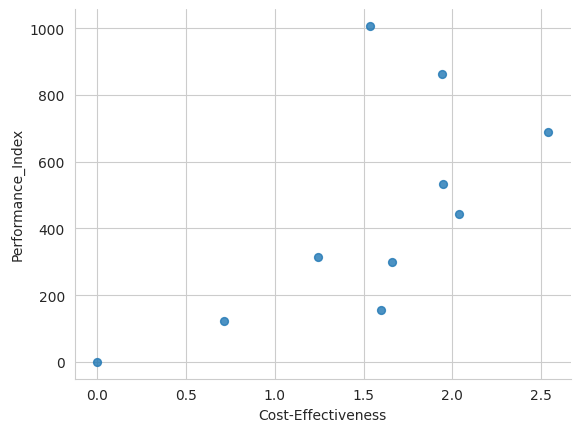

In [10]:
from matplotlib import pyplot as plt
new_features_summary.plot(kind='scatter', x='Cost-Effectiveness', y='Performance_Index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Points_per_Game vs Cost-Effectiveness

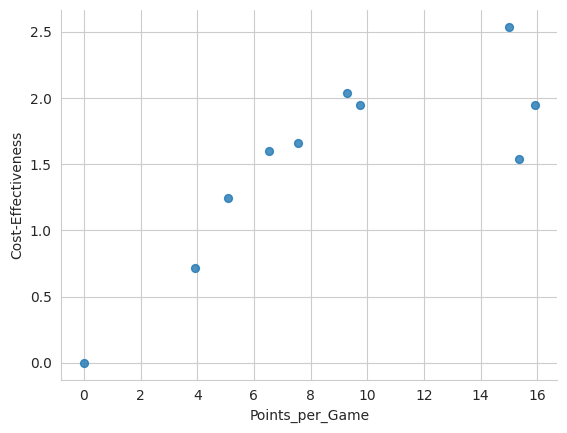

In [11]:
from matplotlib import pyplot as plt
new_features_summary.plot(kind='scatter', x='Points_per_Game', y='Cost-Effectiveness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Pairwise Relationships Between Top Features for High-Performing Players

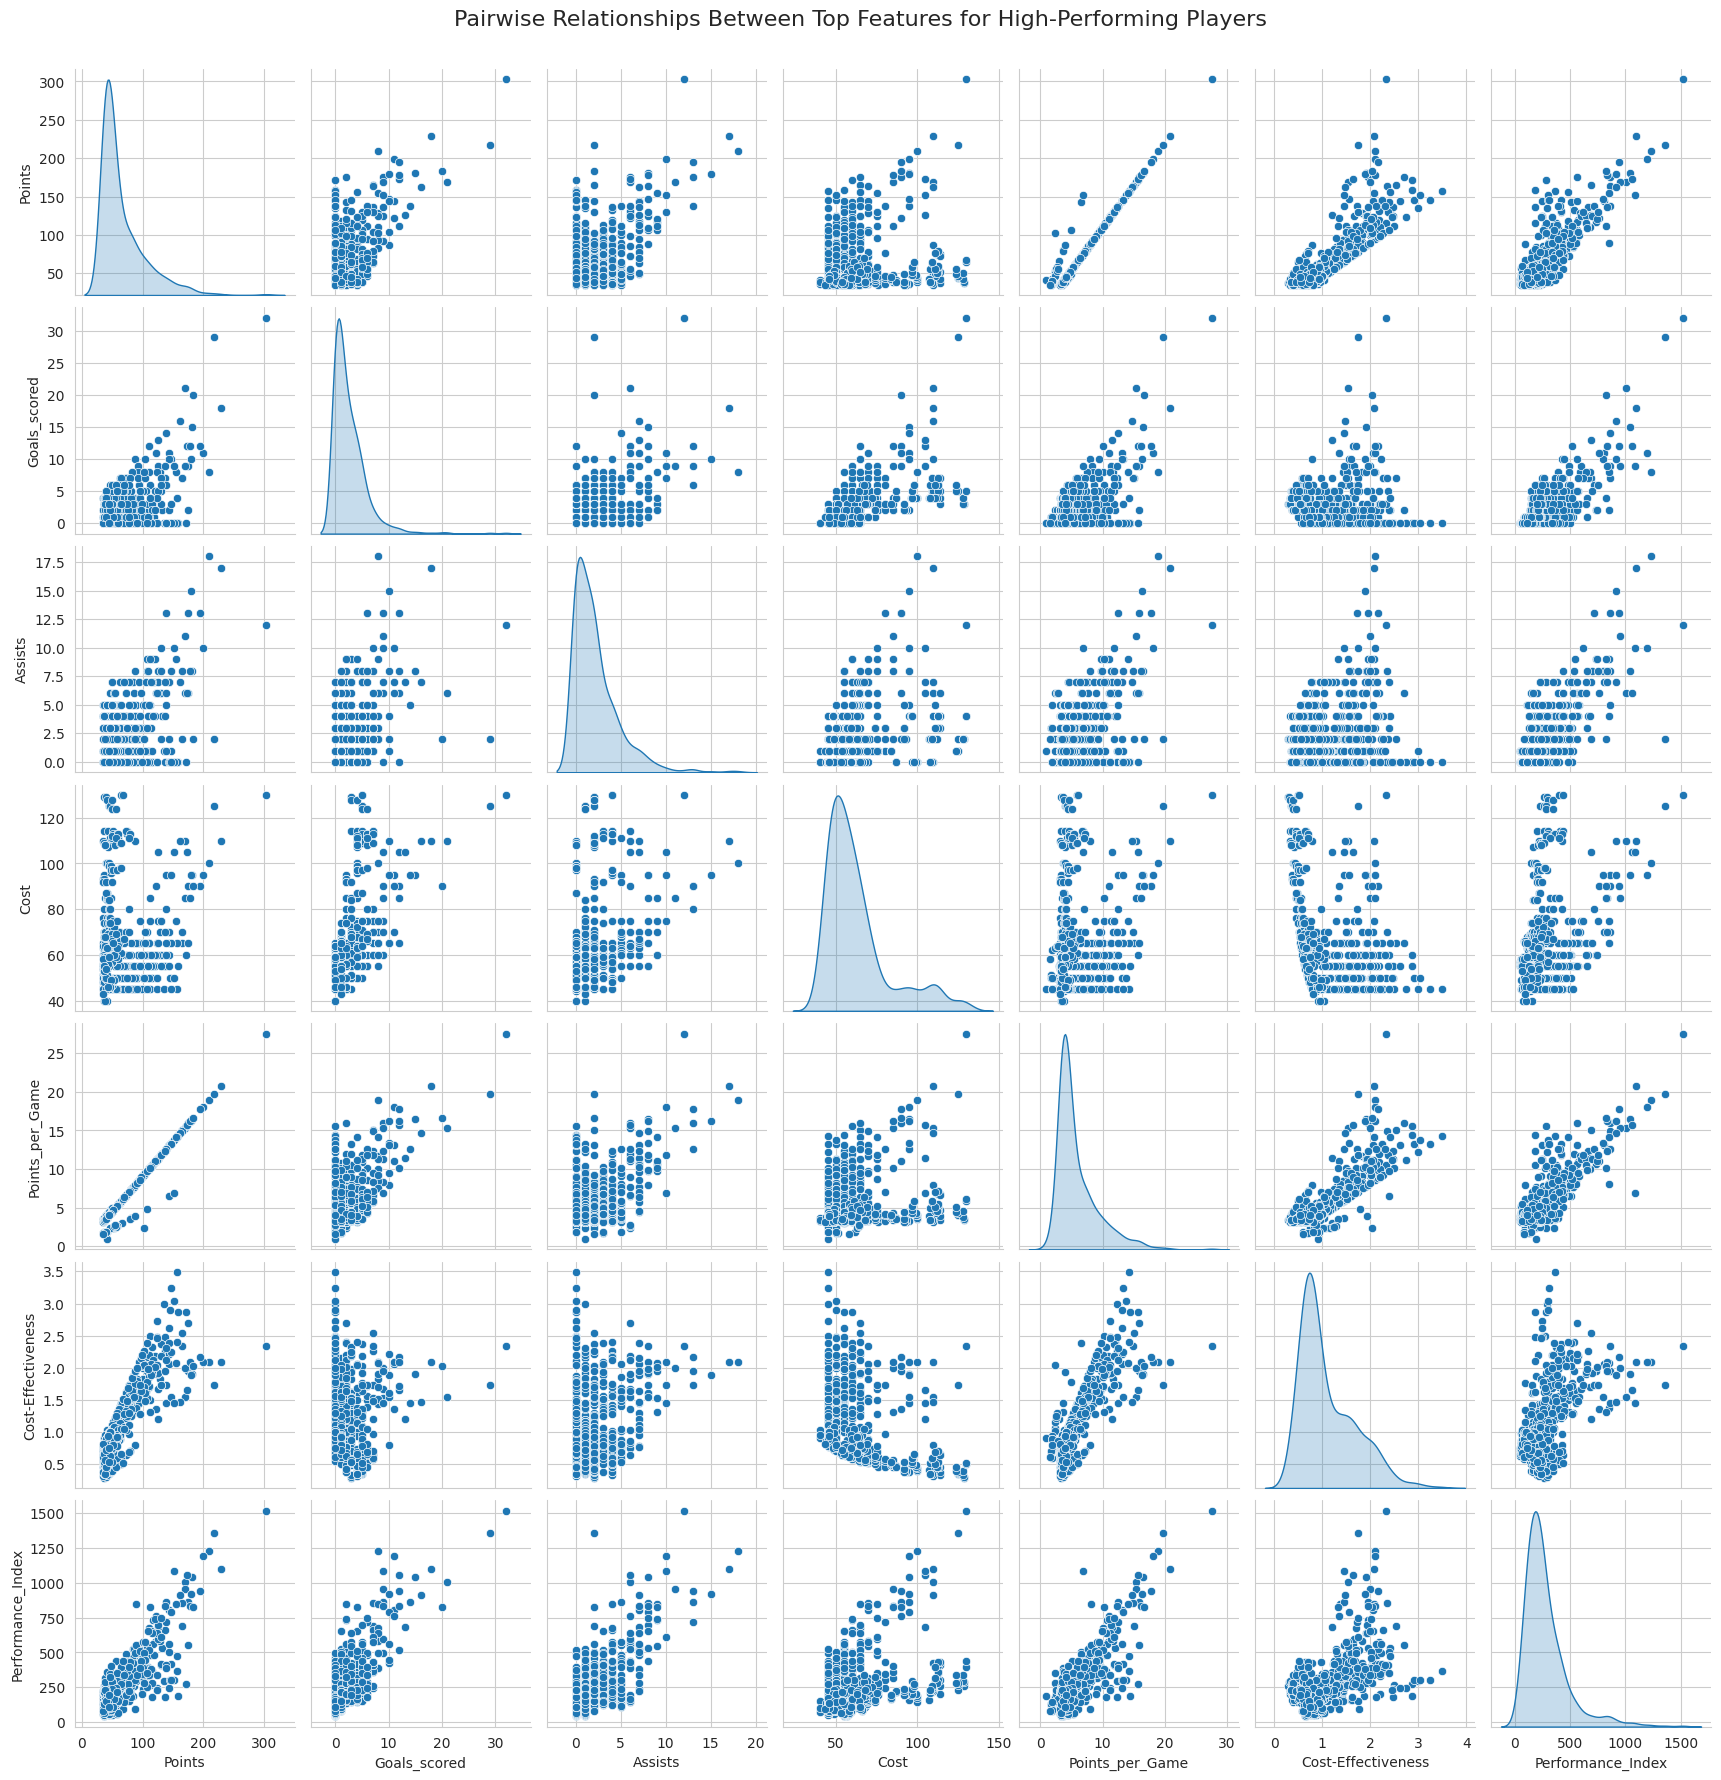

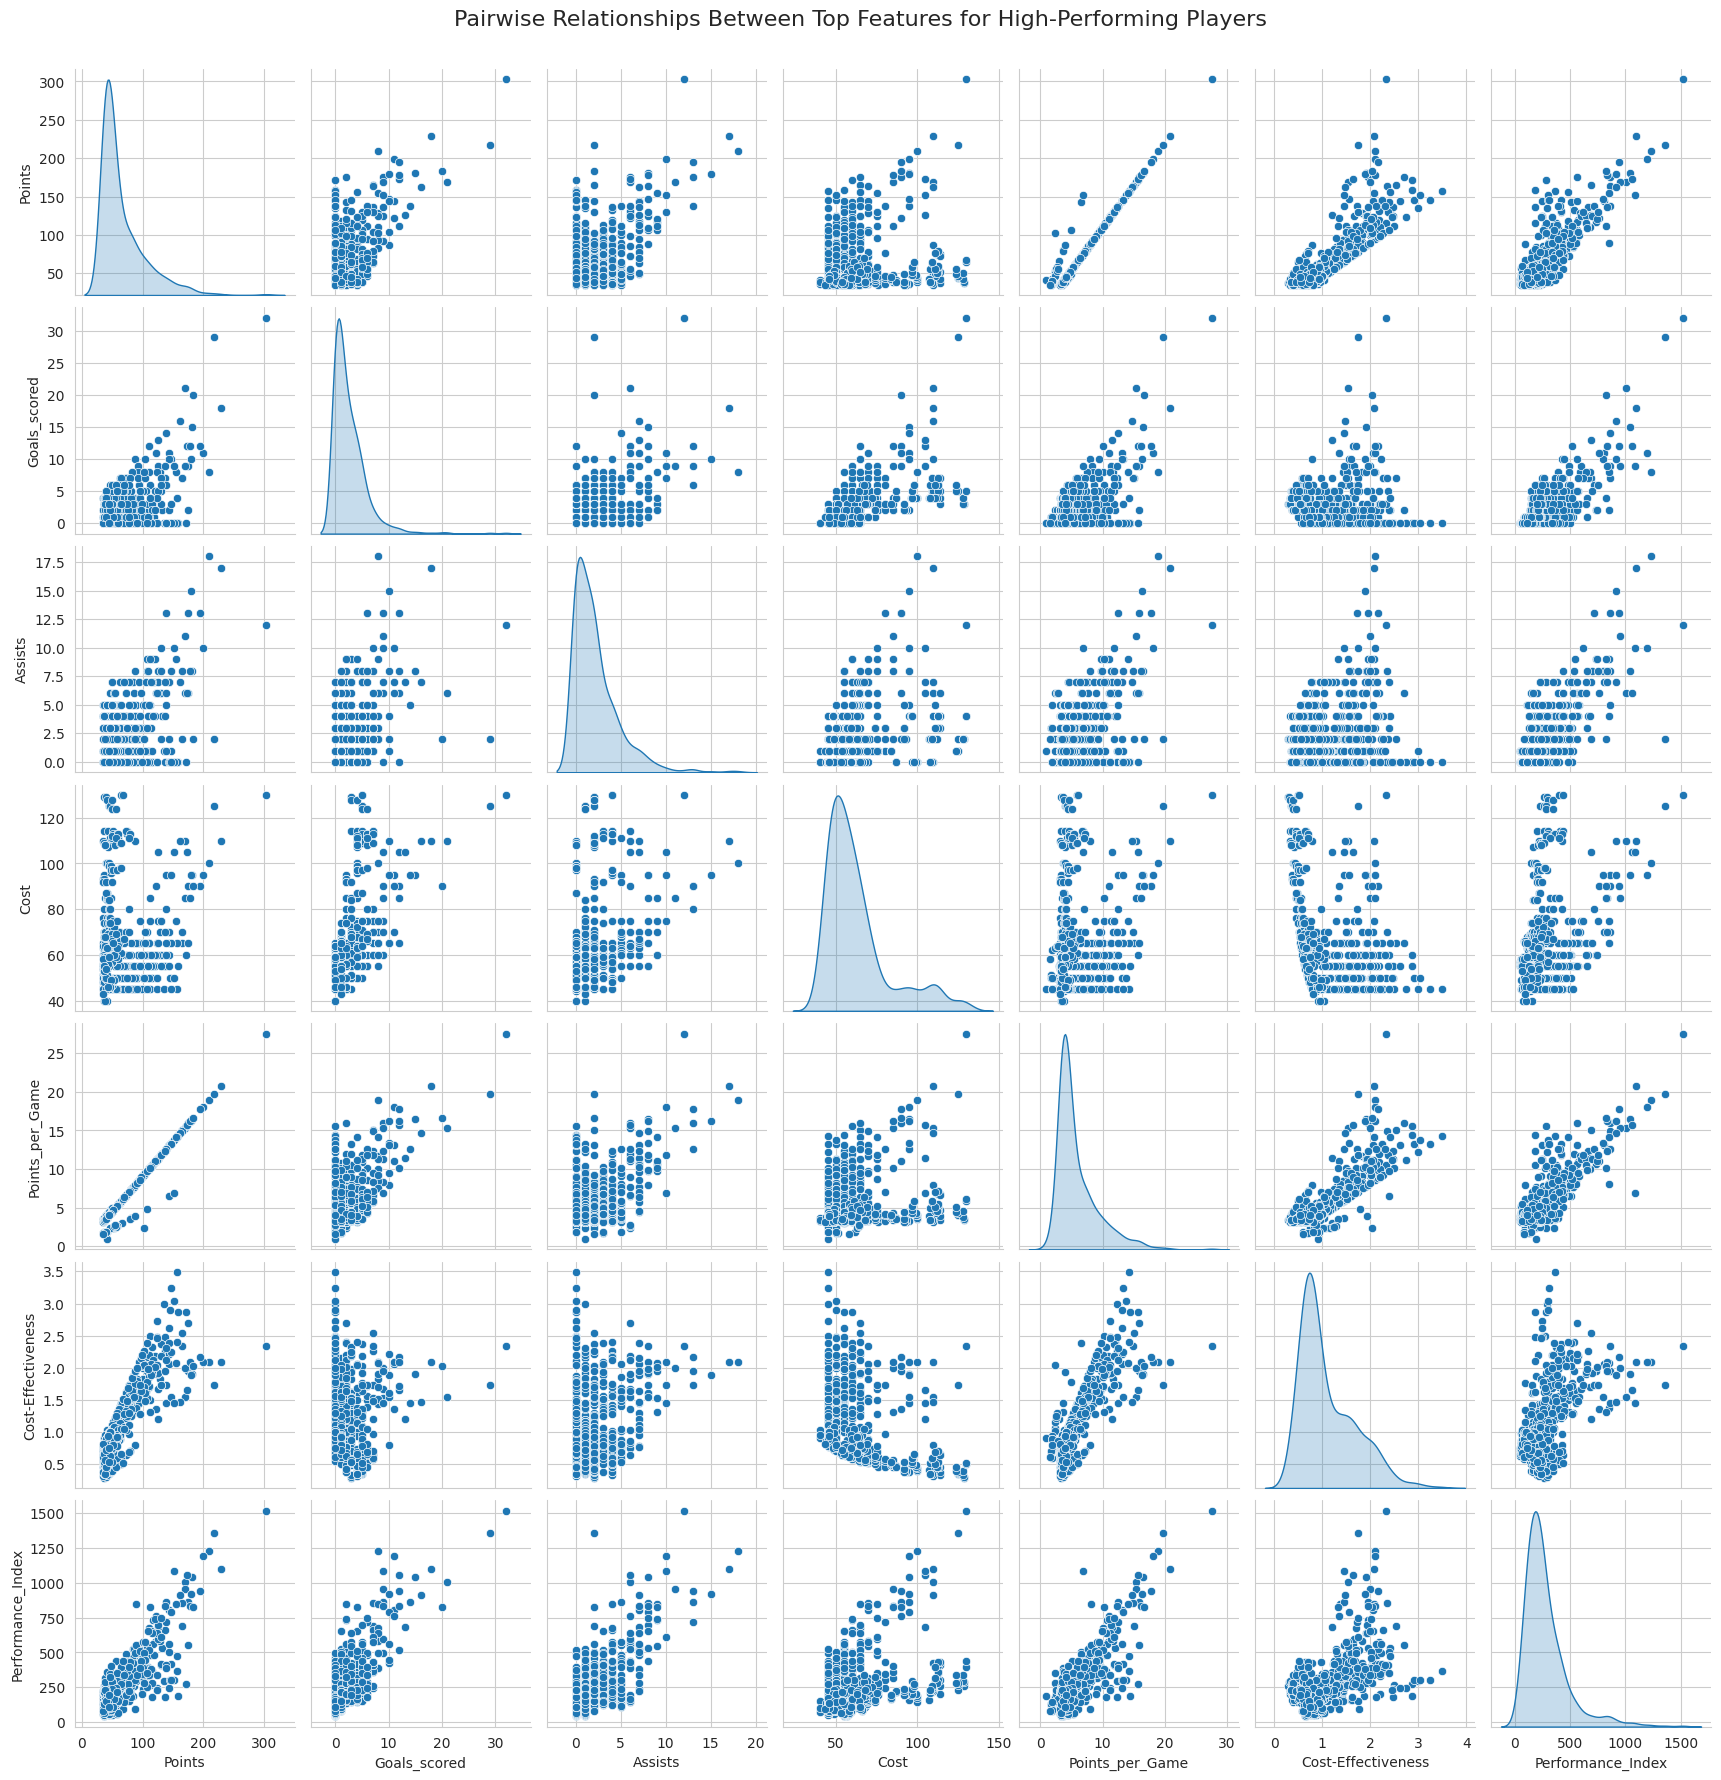

In [12]:
import numpy as np

# Filter data for high-performing players (e.g., top 10% in points)
top_10_percent_points = combined_data['Points'].quantile(0.90)
high_performers = combined_data[combined_data['Points'] >= top_10_percent_points]

# Selecting features for the pair plot
features_to_plot = ['Points', 'Goals_scored', 'Assists', 'Cost', 'Points_per_Game', 'Cost-Effectiveness', 'Performance_Index']

# Ensure all selected features are finite by dropping any non-finite values for the visualization
high_performers_clean = high_performers[features_to_plot].dropna().astype(float)
high_performers_clean = high_performers_clean[np.isfinite(high_performers_clean).all(axis=1)]

# Create pair plot using seaborn
sns.pairplot(high_performers[features_to_plot], kind='scatter', diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Top Features for High-Performing Players', size=16, y=1.02)
plt.show()

# Create pair plot using seaborn after cleaning
sns.pairplot(high_performers_clean, kind='scatter', diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Top Features for High-Performing Players', size=16, y=1.02)
plt.show()

# Select a subset of the features for a simpler pair plot to ensure it works without errors
subset_features = ['Points', 'Goals_scored', 'Assists', 'Cost', 'Points_per_Game']

#Probability and Statistics

Analysis of Variance (ANOVA)
To test if there are statistically significant differences in points scored between different positions (DEF, MID, FWD, GKP).

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model
model = ols('Points ~ C(Position)', data=combined_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                   sum_sq      df         F    PR(>F)
C(Position)  6.912701e+03     3.0  4.375622  0.004398
Residual     3.085391e+06  5859.0       NaN       NaN


#Jackknife resampling method to estimate the mean and variance of player points

In [14]:
import numpy as np

def jackknife_resample(data):
    """ Perform jackknife resampling on the dataset and estimate mean and variance. """
    n = len(data)
    jackknife_means = np.zeros(n)

    for i in range(n):
        jackknife_sample = np.delete(data, i)  # Delete i-th element
        jackknife_means[i] = np.mean(jackknife_sample)

    mean_estimate = np.mean(jackknife_means)
    variance_estimate = (n - 1) / n * np.sum((jackknife_means - mean_estimate) ** 2)

    return mean_estimate, variance_estimate

# Apply jackknife to player points
points_data = combined_data['Points']
mean_jk, variance_jk = jackknife_resample(points_data)

print(f"Jackknife Estimated Mean: {mean_jk}")
print(f"Jackknife Estimated Variance: {variance_jk}")


Jackknife Estimated Mean: 13.498209107965206
Jackknife Estimated Variance: 0.08997387729465331


#Bootstrap resampling and calculate the mean along with its 95% confidence interval

In [15]:
import numpy as np

def bootstrap_resample(data, n_bootstrap=10000):
    """ Perform bootstrap resampling on the dataset. """
    n = len(data)
    bootstrap_samples = np.empty(n_bootstrap)

    for i in range(n_bootstrap):
        sample_indices = np.random.randint(0, n, n)  # generate random indices
        sample = data[sample_indices]  # create the bootstrap sample
        bootstrap_samples[i] = np.mean(sample)  # calculate the mean of the sample

    mean_estimate = np.mean(bootstrap_samples)
    confidence_interval = np.percentile(bootstrap_samples, [2.5, 97.5])

    return mean_estimate, confidence_interval

# Sample data from the 'Points' column
points_data = combined_data['Points'].values  # ensure it's a numpy array for indexing

# Perform bootstrap resampling
mean_bs, ci_bs = bootstrap_resample(points_data)

print(f"Bootstrap Estimated Mean: {mean_bs}")
print(f"95% Confidence Interval: {ci_bs}")


Bootstrap Estimated Mean: 13.49504417533686
95% Confidence Interval: [12.91894082 14.08545966]


# Using PCA

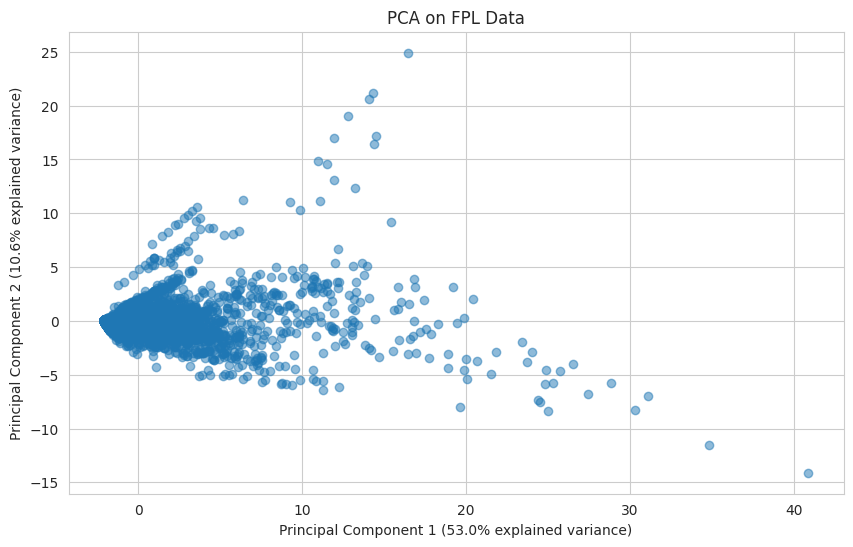

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting relevant columns for PCA
features = [
    'Cost', 'Creativity', 'Influence', 'Threat', 'ICT', 'Goals_conceded', 'Goals_scored',
    'Assists', 'Own_goals', 'Penalties_missed', 'Penalties_saved', 'Saves', 'Yellow_cards',
    'Red_cards', 'TSB', 'Minutes', 'Bonus', 'Points', 'Points_per_Game', 'Cost-Effectiveness',
    'Performance_Index'
]

# Extracting the features
X = combined_data[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Name'] = combined_data['Name']
pca_df

# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.title('PCA on FPL Data')
plt.xlabel('Principal Component 1 (53.0% explained variance)')
plt.ylabel('Principal Component 2 (10.6% explained variance)')
plt.grid(True)
plt.show()


#GMM


In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming 'combined_data' is already loaded as a merged DataFrame of all weeks
# We'll focus on a subset of the performance metrics for GMM

# Select relevant features for GMM modeling
features_for_gmm = combined_data[['Points', 'Goals_scored', 'Assists', 'Creativity', 'Influence', 'Threat']]
features_for_gmm = features_for_gmm.dropna()  # Ensure no NaN values

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_gmm)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # Using 3 components as a starting point
gmm.fit(features_scaled)

# Predict the component membership
cluster_labels = gmm.predict(features_scaled)

# Calculate cluster centers and transform them back to the original scale for interpretation
cluster_centers = scaler.inverse_transform(gmm.means_)

# Report findings
cluster_summary = pd.DataFrame(cluster_centers, columns=['Points', 'Goals_scored', 'Assists', 'Creativity', 'Influence', 'Threat'])
cluster_summary


,Points,Goals_scored,Assists,Creativity,Influence,Threat
0,4.171437,1.720846e-15,1.609823e-15,11.688653,26.803465,8.802437
1,71.278840,2.736877e+00,2.494534e+00,256.515589,384.768177,287.684098
2,19.837542,9.001821e-01,8.439357e-01,79.946243,103.222576,97.213367


Statistical Distribution of Players in Each Cluster

<ipython-input-18-5da611f0f1ee>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


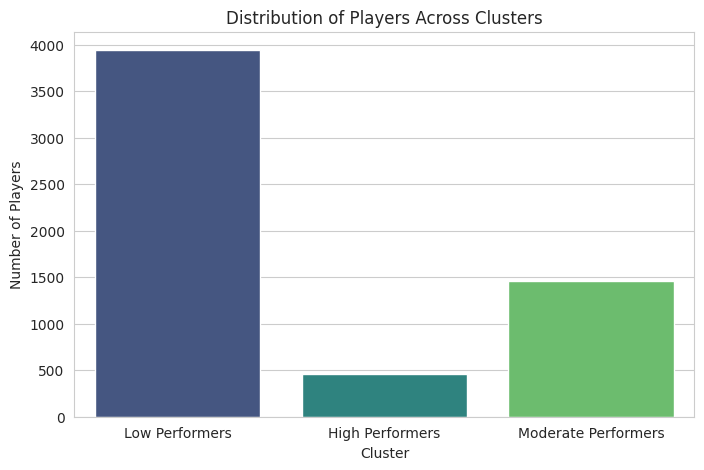

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of players in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

# Plotting the distribution of players across clusters
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Distribution of Players Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.xticks(ticks=range(len(cluster_counts)), labels=['Low Performers', 'High Performers', 'Moderate Performers'])
plt.show()


# KS test, AD test

In [19]:
from scipy.stats import kstest, anderson, norm
import numpy as np

# Normalize the 'Points' data
points_normalized = (combined_data['Points'] - np.mean(combined_data['Points'])) / np.std(combined_data['Points'])

# Kolmogorov-Smirnov test for normality without specifying mean and std
ks_stat, ks_p = kstest(points_normalized, 'norm')
print("KS Test Statistic:", ks_stat)
print("KS Test P-value:", ks_p)

# Anderson-Darling test for normality
ad_result = anderson(combined_data['Points'], dist='norm')
print("AD Test Statistic:", ad_result.statistic)
print("Significance Levels:", ad_result.significance_level)
print("Critical Values:", ad_result.critical_values)

# Assessing the results against critical values
for i, cv in enumerate(ad_result.critical_values):
    sl = ad_result.significance_level[i]
    if ad_result.statistic > cv:
        print(f"Reject the null hypothesis of normality at the {sl}% level.")
    else:
        print(f"Fail to reject the null hypothesis of normality at the {sl}% level.")

KS Test Statistic: 0.2742555020058723
KS Test P-value: 0.0
AD Test Statistic: 623.9930175891968
Significance Levels: [15.  10.   5.   2.5  1. ]
Critical Values: [0.576 0.656 0.786 0.917 1.091]
Reject the null hypothesis of normality at the 15.0% level.
Reject the null hypothesis of normality at the 10.0% level.
Reject the null hypothesis of normality at the 5.0% level.
Reject the null hypothesis of normality at the 2.5% level.
Reject the null hypothesis of normality at the 1.0% level.


#Bayesian Model

using PyMC to set up a Bayesian model for predicting player points based on assists and minutes played

In [20]:
!pip install pymc3

In [21]:
#using PyMC to set up a Bayesian model for predicting player points based on assists and minutes played
import pymc as pm
import numpy as np
import arviz as az

# Example data
points = np.array(combined_data['Points'])
assists = np.array(combined_data['Assists'])
minutes = np.array(combined_data['Minutes'])

# Define the model
with pm.Model() as model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    assist_coef = pm.Normal('assist_coef', mu=0, sigma=1)
    minutes_coef = pm.Normal('minutes_coef', mu=0, sigma=0.01)
    sigma = pm.Exponential('sigma', 1)

    # Likelihood
    points_est = intercept + assist_coef * assists + minutes_coef * minutes
    points_obs = pm.Normal('points_obs', mu=points_est, sigma=sigma, observed=points)

    # Inference with automatic InferenceData return
    trace = pm.sample(5000)  # No need for return_inferencedata argument

# Posterior analysis
trace


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [22]:
# Summary of the posterior distributions of the model parameters
summary = az.summary(trace)
print(summary)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept    -0.171  0.113  -0.377    0.045      0.001    0.001    8529.0   
assist_coef   5.506  0.098   5.318    5.687      0.001    0.001    8157.0   
minutes_coef  0.036  0.000   0.035    0.036      0.000    0.000    7830.0   
sigma         7.306  0.067   7.185    7.438      0.001    0.000    9408.0   

              ess_tail  r_hat  
intercept       7211.0    1.0  
assist_coef     7886.0    1.0  
minutes_coef    7672.0    1.0  
sigma           7351.0    1.0  


Gaussian model for predicting player points based on assists and minutes played

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
data = np.column_stack((points, assists, minutes))
data_scaled = scaler.fit_transform(data)

# Initialize and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)  # Adjust n_components based on your data
gmm.fit(data_scaled)

# Predict the cluster for each observation
labels = gmm.predict(data_scaled)

# Probabilities of each data point to belong to each cluster
probabilities = gmm.predict_proba(data_scaled)

# Mean of each cluster
means = gmm.means_

# Covariances of each cluster
covariances = gmm.covariances_

print("Cluster Labels:")
print(labels)

print("\nProbabilities of Each Data Point to Belong to Each Cluster:")
print(probabilities)

print("\nMean of Each Cluster:")
print(means)

print("\nCovariances of Each Cluster:")
print(covariances)

Cluster Labels:
[1 1 1 ... 0 0 2]

Probabilities of Each Data Point to Belong to Each Cluster:
[[0.00000000e+00 1.00000000e+00 6.64002433e-14]
 [4.62861934e-06 9.99995317e-01 5.41991246e-08]
 [0.00000000e+00 1.00000000e+00 9.29530613e-57]
 ...
 [9.90605838e-01 9.07075211e-03 3.23410168e-04]
 [9.99989052e-01 1.65693826e-06 9.29065411e-06]
 [0.00000000e+00 1.14531859e-01 8.85468141e-01]]

Mean of Each Cluster:
[[-0.32078337 -0.35949756 -0.29323493]
 [ 2.4839294   2.17975756  2.32784474]
 [ 0.34037724  0.70654226  0.28034006]]

Covariances of Each Cluster:
[[[1.58082847e-01 4.78593314e-29 1.70441797e-01]
  [4.79039087e-29 1.00000000e-06 4.56026043e-29]
  [1.70441797e-01 4.55858878e-29 2.29994169e-01]]

 [[3.20736717e+00 1.64092591e+00 2.66108588e+00]
  [1.64092591e+00 5.39113660e+00 2.93796910e-01]
  [2.66108588e+00 2.93796910e-01 3.47844784e+00]]

 [[2.39290262e-01 5.60680587e-02 1.96443806e-01]
  [5.60680587e-02 1.32963261e-01 3.46746836e-02]
  [1.96443806e-01 3.46746836e-02 2.47327313e

# AIC and BIC


GMM

In [24]:
# Calculate AIC and BIC for GMM
gmm_aic = gmm.aic(data_scaled)
gmm_bic = gmm.bic(data_scaled)
print("GMM AIC:", gmm_aic)
print("GMM BIC:", gmm_bic)


GMM AIC: -35633.468672997005
GMM BIC: -35439.85258878504


Bayesian

In [25]:
# Extracting mean and standard deviation from the summary statistics
means = summary['mean'].values
stds = summary['sd'].values

# Filter out zero standard deviation values
non_zero_std_indices = np.where(stds != 0)[0]
non_zero_means = means[non_zero_std_indices]
non_zero_stds = stds[non_zero_std_indices]

# Remove associated mean and standard deviation values from other arrays
filtered_points = points[non_zero_std_indices]
filtered_assists = assists[non_zero_std_indices]
filtered_minutes = minutes[non_zero_std_indices]

# Assuming you have the number of observations 'n_obs' available
n_obs = len(filtered_points)

# Calculate log-likelihood for non-zero standard deviations
log_likelihood = -0.5 * n_obs * (np.log(2 * np.pi) + np.log(non_zero_stds ** 2) + np.sum(((filtered_points - non_zero_means) / non_zero_stds) ** 2))

# Number of parameters including intercept
n_params = len(means) - 1

# Number of samples (assuming each point is an independent observation)
n_samples = 5000  # replace with the actual number of samples

# Calculate AIC and BIC
bayesian_aic = 2 * n_params - 2 * log_likelihood
bayesian_bic = np.log(n_obs) * n_params - 2 * log_likelihood

# Replace infinite values with a large number
bayesian_aic = np.where(np.isinf(bayesian_aic), 1e12, bayesian_aic)
bayesian_bic = np.where(np.isinf(bayesian_bic), 1e12, bayesian_bic)

print("Bayesian Regression AIC:", bayesian_aic)
print("Bayesian Regression BIC:", bayesian_bic)

Bayesian Regression AIC: [8115035.35159465 8115034.49707261 8115032.21542346]
Bayesian Regression BIC: [8115032.64743152 8115031.79290948 8115029.51126032]


#Problem statements

**Player Performance Clustering:** Can we cluster players based on their performance data? This could help identify similar players and could be useful for player scouting and selection.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

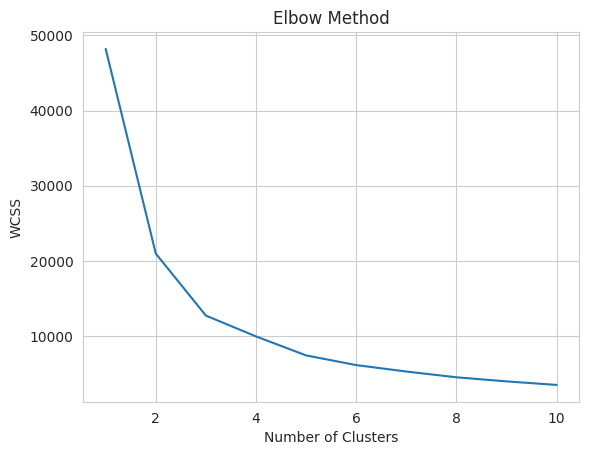

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


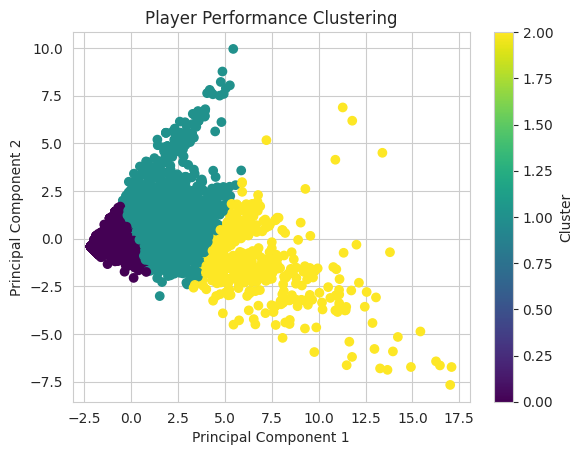

              Name  Goals_scored  Assists  Saves  Minutes  Cluster
997        Abraham             0        0      0        0        0
1526       Abraham             0        0      0        0        0
2063       Abraham             0        0      0        0        0
2600       Abraham             0        0      0        0        0
3138       Abraham             0        0      0        0        0
...            ...           ...      ...    ...      ...      ...
3675  van La Parra             0        0      0      347        0
4217  van La Parra             0        0      0      405        0
4763  van La Parra             0        0      0      405        0
5311  van La Parra             0        0      0      405        0
5861  van La Parra             0        0      0      405        0

[5329 rows x 6 columns]


In [28]:
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = ['Goals_scored', 'Assists', 'Saves', 'Minutes', 'Goals_conceded',
                     'Yellow_cards', 'Red_cards', 'Creativity', 'Influence', 'Threat',
                     'ICT', 'TSB', 'Bonus', 'Points']
X = combined_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Choose the number of clusters (e.g., using the elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to determine the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_pca)

# Add cluster labels to the DataFrame
combined_data['Cluster'] = kmeans.labels_

# Visualize the clusters in 2D (PCA-reduced space)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Player Performance Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Display the clustered data
print(combined_data[['Name', 'Goals_scored', 'Assists', 'Saves', 'Minutes', 'Cluster']])